# Normalizing Flows

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tomo_challenge import load_data

Found classifier Random
Found classifier IBandOnly
Found classifier ZotBin
Found classifier RandomForest


In [65]:
from zotbin.group import plotfbins
from zotbin.flow import learn_flow
from zotbin.util import prepare, get_signature

In [4]:
bands='riz'
include_colors=False
include_errors=False

In [8]:
#train_file='/media/data2/tomo_challenge_data/ugrizy_buzzard/training.hdf5'
#train_file = '/Users/david/Data/DESC/tomo/ugrizy/training.hdf5'
train_file = '/Users/david/Data/DESC/tomo/ugrizy_buzzard/training.hdf5'
train_data = load_data(train_file, bands, errors=False, colors=False, array=True)
print(f'Loaded {len(train_data)} training rows.')

Loaded 5410171 training rows.


In [9]:
features, detected = prepare(train_data, bands)

Found 50677 galaxies with undetected flux in at least one band.


In [10]:
X = features[detected]

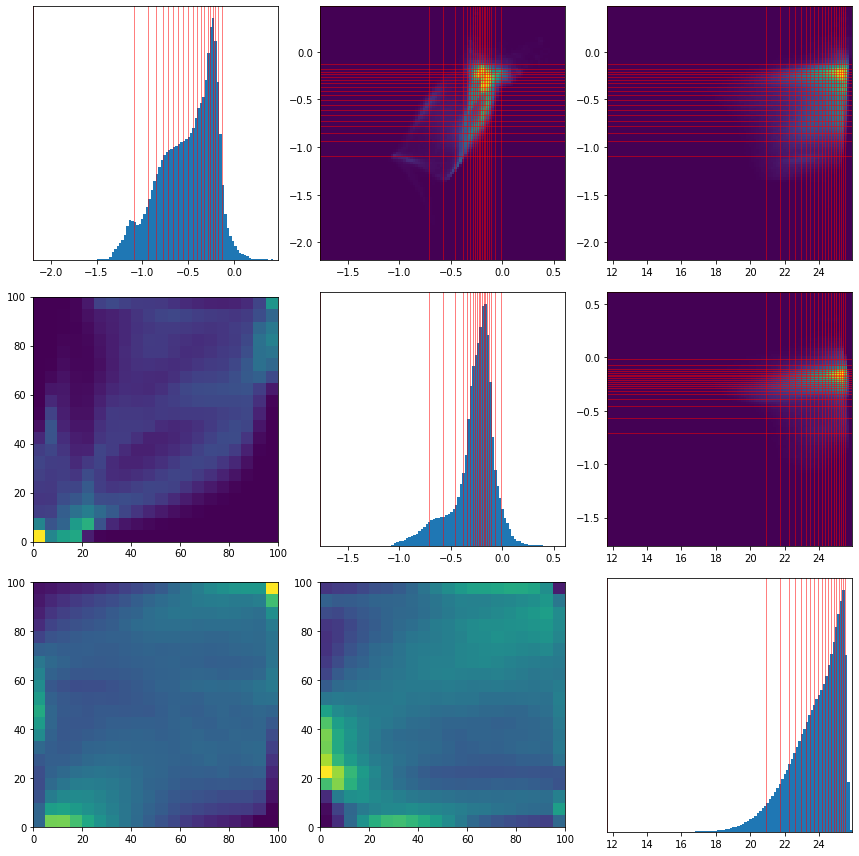

In [11]:
plotfbins(X, inset_pct=0)

/Users/david/anaconda3/envs/jax/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


epoch 25 loss 3.260


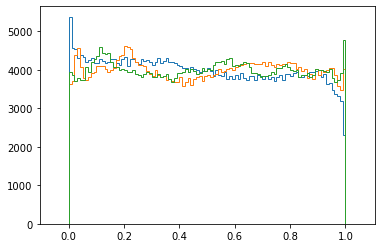

epoch 50 loss 3.251


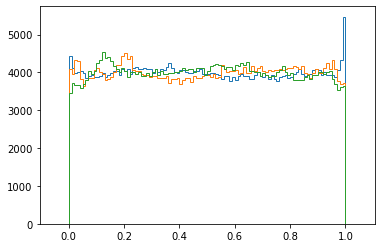

epoch 75 loss 3.230


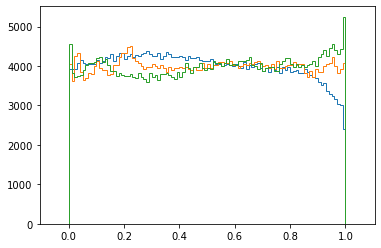

epoch 100 loss 3.237


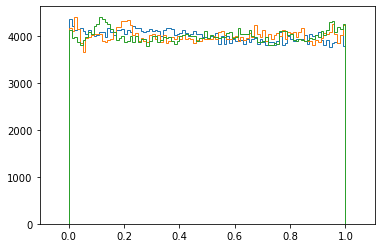

epoch 125 loss 3.200


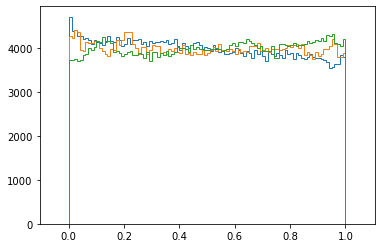

epoch 150 loss 3.244


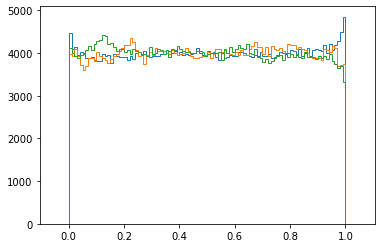

epoch 175 loss 3.214


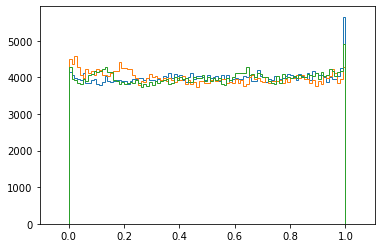

epoch 200 loss 3.232


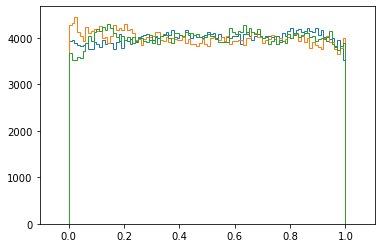

CPU times: user 14min 29s, sys: 2min 26s, total: 16min 55s
Wall time: 5min 38s


In [12]:
%time flow_map = learn_flow(X[:400000], interval=25)

In [13]:
%time U = flow_map(X)

CPU times: user 25.5 s, sys: 29.5 s, total: 55 s
Wall time: 9.81 s


In [14]:
np.all(np.isfinite(U))

True

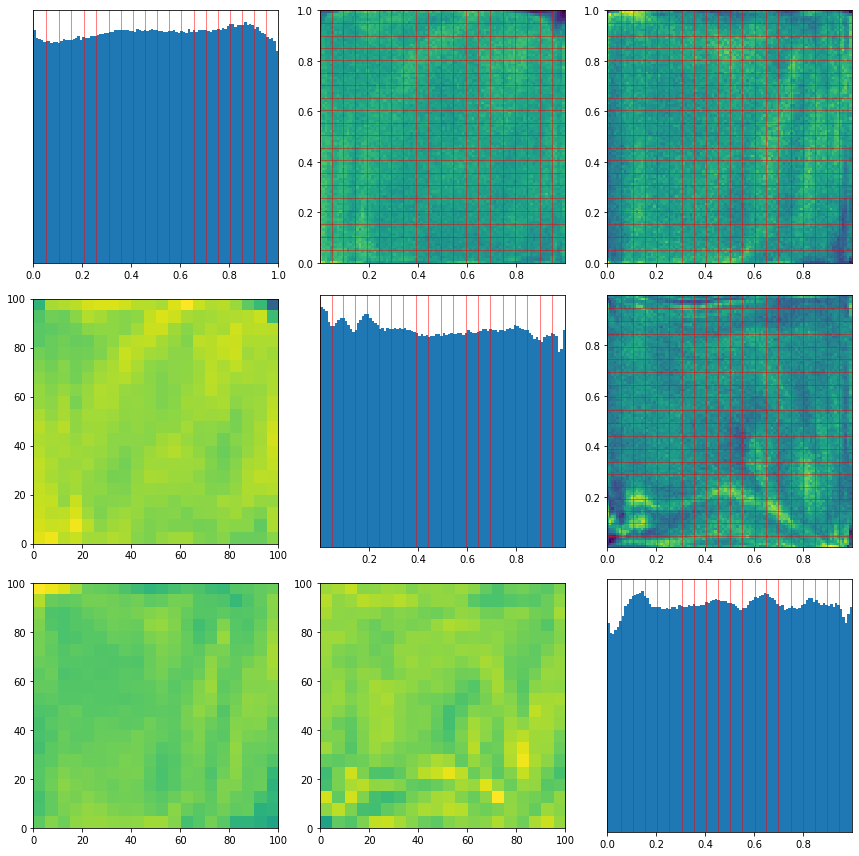

In [15]:
plotfbins(U, inset_pct=0)

In [16]:
np.savez('uniform_buz_riz.npz', uniform=U, detected=detected)

In [17]:
!ls -lh uniform_buz_riz.npz

-rw-r--r--  1 david  staff   128M Sep 12 14:12 uniform_buz_riz.npz


In [63]:
def save_preprocessed(X, U):
    """
    """
    fname = 'preprocessed_{0}.npy'.format(get_signature(X))
    np.save(fname, U)
    
save_preprocessed(X, U)

In [64]:
def load_preprocessed(X):
    """
    """
    fname = 'preprocessed_{0}.npy'.format(get_signature(X))
    return np.load(fname) if fname.exists() else None

U2 = load_preprocessed(X)

AttributeError: 'str' object has no attribute 'exists'

In [60]:
assert np.array_equal(U, U2)